### Import libs

In [4]:
import shelve
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from collections import Counter
sys.path.append('..')

from Shared_Files.Music_Pallete import *
from Pre_Production.Midi_Pre_Processor import *

### De-serialized model history

In [5]:
model_hist_shelve = shelve.open("/home/eric/Desktop/Coding/Python_Files/Artificial_Intelligence/LyreBird/Data_Dump/Shelves/Models_History")

FileNotFoundError: [Errno 2] No such file or directory: '/home/eric/Desktop/Coding/Python_Files/Artificial_Intelligence/LyreBird/Data_Dump/Shelves/Models_History.dat'

# Set up general plot data 

In [3]:
def annot_max(x,y, ax=None):
    x = np.array(x)
    y = np.array(y)
    
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "Epochs={:.3f}, Max_Acc={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="#add8e6", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=90", facecolor='blue')

    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.99,ymax + (ymax/5)), **kw)
    


In [4]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(17,12)})

# Plot the responses for different events and regions
sns.set_palette("muted")

### Model Graph Category_Based_RNN_v12 50 instr/note Sequence Focus

### Extract meta data from train/test split

In [5]:
max_train_idx = np.argmax(model_hist_shelve["Category_Based_RNN_v12"]["Train_Accuracy"])
max_train_acc = model_hist_shelve["Category_Based_RNN_v12"]["Train_Accuracy"][max_train_idx]

max_test_idx = np.argmax(model_hist_shelve["Category_Based_RNN_v12"]["Test_Accuracy"])
max_test_acc = model_hist_shelve["Category_Based_RNN_v12"]["Test_Accuracy"][max_test_idx]

epochs_list = list(range(1,len(model_hist_shelve["Category_Based_RNN_v12"]["Train_Accuracy"])+1))

### Graph data

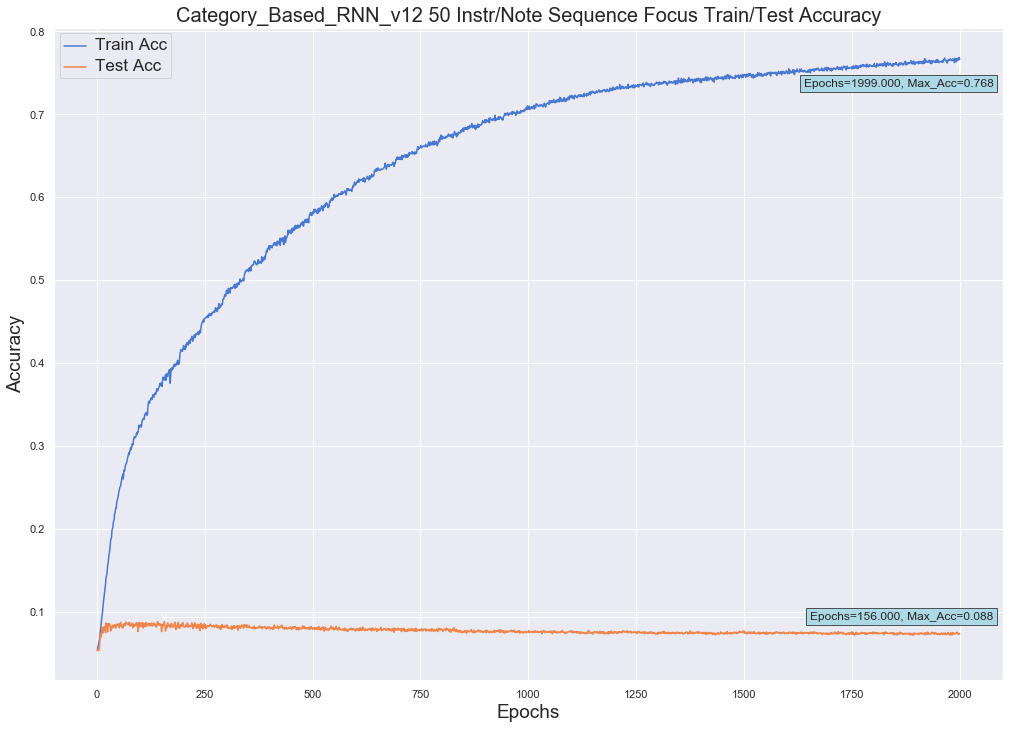

In [6]:
sns.lineplot(label="Train Acc",x=epochs_list, y=model_hist_shelve["Category_Based_RNN_v12"]["Train_Accuracy"])
ax = sns.lineplot(label="Test Acc",x=epochs_list, y=model_hist_shelve["Category_Based_RNN_v12"]["Test_Accuracy"])
annot_max(epochs_list,model_hist_shelve["Category_Based_RNN_v12"]["Train_Accuracy"], ax)
ax.set_title('Category_Based_RNN_v12 50 Instr/Note Sequence Focus Train/Test Accuracy', fontsize=20)
annot_max(epochs_list,model_hist_shelve["Category_Based_RNN_v12"]["Test_Accuracy"], ax)
ax.set_ylabel('Accuracy', fontsize=19)
ax.set_xlabel('Epochs', fontsize=19)
ax.legend()
plt.setp(ax.get_legend().get_texts(), fontsize='17') # for legend text

plt.show()
plt.close()

In [7]:
pre_processor_shelve = shelve.open("/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/LyreBird/Data_Dump/Shelves/Midi_Pre_Processor")

In [8]:
pre_processor_obj = pre_processor_shelve["pre_processor"]

In [9]:
all_possible_instr_note_pairs = pre_processor_obj.return_all_possible_instr_note_pairs()

centroid_instr_note = None
instr_note_pair_attributes = dict()
set_test_eval = set()

pitch_list = []
count = 0
for instr_note_pair_str in (all_possible_instr_note_pairs)[:1000]:

    instr_note_pair_obj = convert_string_to_instr_note_pair(instr_note_pair_str)

    # Evaluate instr/note pair
    fluid_synth, synth, pitch = extract_instr_note_pair_attributes(instr_note_pair_obj)

    # ---


    if centroid_instr_note is None:
        centroid_instr_note = fluid_synth

    instr_note_pair_attributes[instr_note_pair_str] = fluid_synth
    pitch_list.append(pitch)
    
#     print(instr_note_pair_str)
#     print(instr_note_pair_obj.get_pitch_class_histogram(normalize=False))
#     print()

In [10]:
[k for k,v in instr_note_pair_attributes.items()]

['Program:0-:-Is_Drum:False-:-Note:A#0',
 'Program:0-:-Is_Drum:False-:-Note:A#1',
 'Program:0-:-Is_Drum:False-:-Note:A#2',
 'Program:0-:-Is_Drum:False-:-Note:A#3',
 'Program:0-:-Is_Drum:False-:-Note:A#4',
 'Program:0-:-Is_Drum:False-:-Note:A#5',
 'Program:0-:-Is_Drum:False-:-Note:A#6',
 'Program:0-:-Is_Drum:False-:-Note:A#7',
 'Program:0-:-Is_Drum:False-:-Note:A0',
 'Program:0-:-Is_Drum:False-:-Note:A1',
 'Program:0-:-Is_Drum:False-:-Note:A2',
 'Program:0-:-Is_Drum:False-:-Note:A3',
 'Program:0-:-Is_Drum:False-:-Note:A4',
 'Program:0-:-Is_Drum:False-:-Note:A5',
 'Program:0-:-Is_Drum:False-:-Note:A6',
 'Program:0-:-Is_Drum:False-:-Note:A7',
 'Program:0-:-Is_Drum:False-:-Note:B0',
 'Program:0-:-Is_Drum:False-:-Note:B1',
 'Program:0-:-Is_Drum:False-:-Note:B2',
 'Program:0-:-Is_Drum:False-:-Note:B3',
 'Program:0-:-Is_Drum:False-:-Note:B4',
 'Program:0-:-Is_Drum:False-:-Note:B5',
 'Program:0-:-Is_Drum:False-:-Note:B6',
 'Program:0-:-Is_Drum:False-:-Note:B7',
 'Program:0-:-Is_Drum:False-:-No

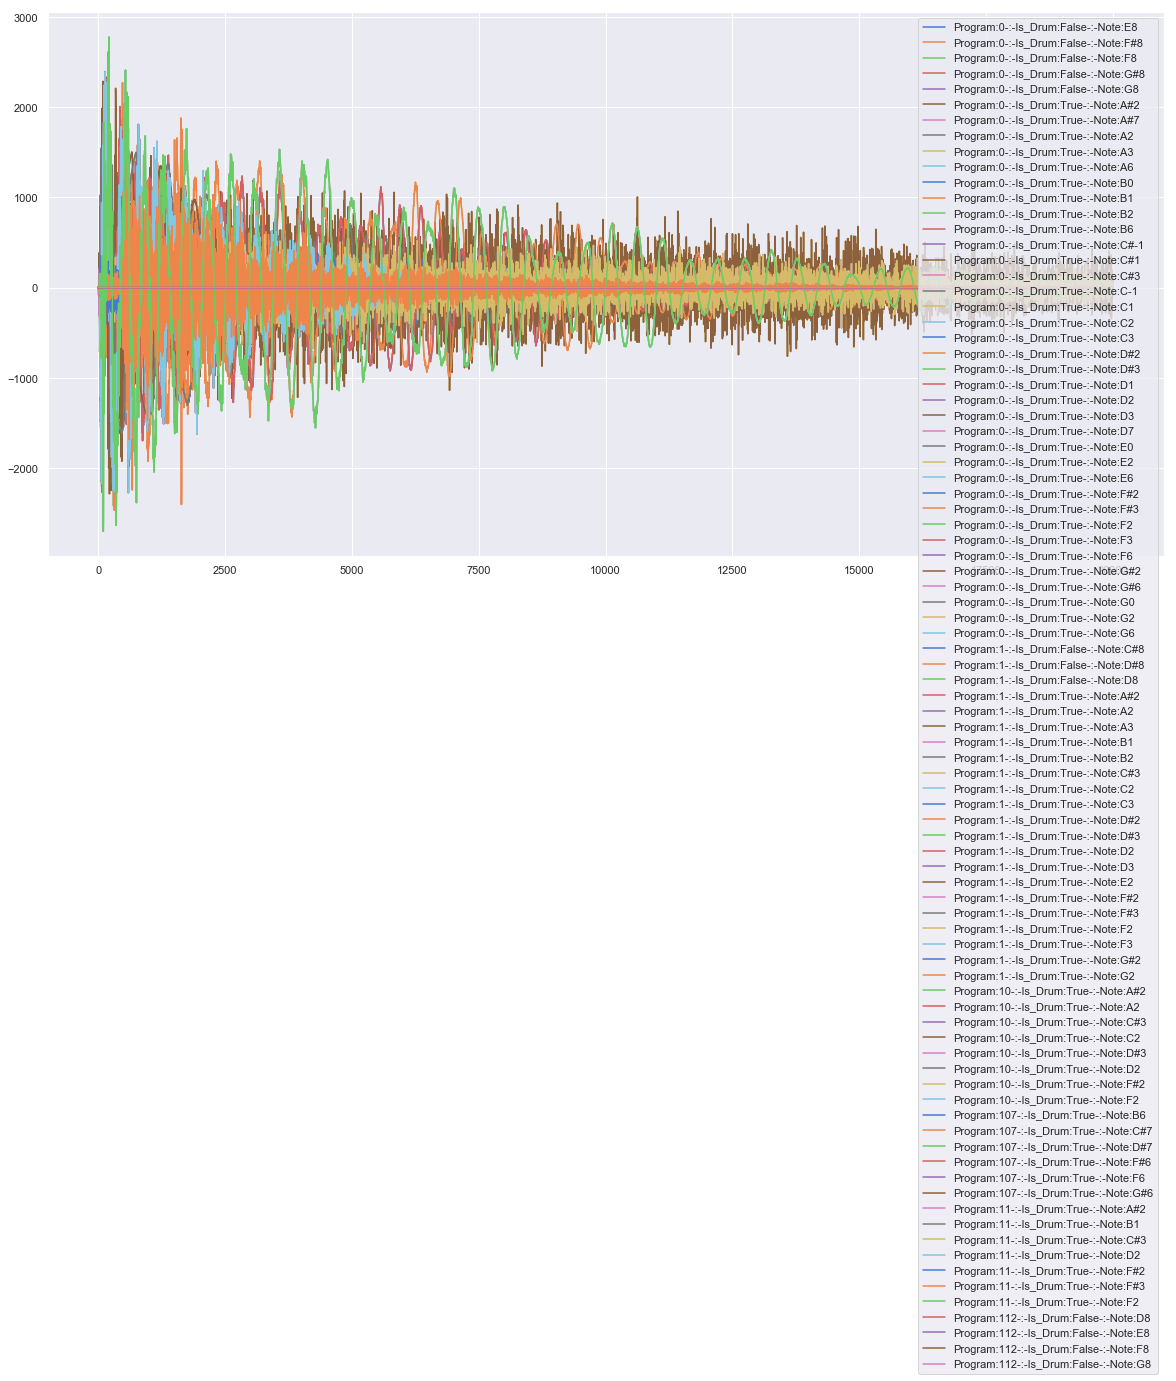

In [16]:
plt.figure(figsize=(20,10))
[plt.plot(np.arange(v.shape[0])[:20000], v[:20000], label=k) for k,v in instr_note_pair_attributes.items() if k in set(['Program:0-:-Is_Drum:False-:-Note:E8', 'Program:0-:-Is_Drum:False-:-Note:F#8', 'Program:0-:-Is_Drum:False-:-Note:F8', 'Program:0-:-Is_Drum:False-:-Note:G#8', 'Program:0-:-Is_Drum:False-:-Note:G8', 'Program:0-:-Is_Drum:True-:-Note:A#2', 'Program:0-:-Is_Drum:True-:-Note:A#7', 'Program:0-:-Is_Drum:True-:-Note:A2', 'Program:0-:-Is_Drum:True-:-Note:A3', 'Program:0-:-Is_Drum:True-:-Note:A6', 'Program:0-:-Is_Drum:True-:-Note:B0', 'Program:0-:-Is_Drum:True-:-Note:B1', 'Program:0-:-Is_Drum:True-:-Note:B2', 'Program:0-:-Is_Drum:True-:-Note:B6', 'Program:0-:-Is_Drum:True-:-Note:C#-1', 'Program:0-:-Is_Drum:True-:-Note:C#1', 'Program:0-:-Is_Drum:True-:-Note:C#3', 'Program:0-:-Is_Drum:True-:-Note:C-1', 'Program:0-:-Is_Drum:True-:-Note:C1', 'Program:0-:-Is_Drum:True-:-Note:C2', 'Program:0-:-Is_Drum:True-:-Note:C3', 'Program:0-:-Is_Drum:True-:-Note:D#2', 'Program:0-:-Is_Drum:True-:-Note:D#3', 'Program:0-:-Is_Drum:True-:-Note:D1', 'Program:0-:-Is_Drum:True-:-Note:D2', 'Program:0-:-Is_Drum:True-:-Note:D3', 'Program:0-:-Is_Drum:True-:-Note:D7', 'Program:0-:-Is_Drum:True-:-Note:E0', 'Program:0-:-Is_Drum:True-:-Note:E2', 'Program:0-:-Is_Drum:True-:-Note:E6', 'Program:0-:-Is_Drum:True-:-Note:F#2', 'Program:0-:-Is_Drum:True-:-Note:F#3', 'Program:0-:-Is_Drum:True-:-Note:F2', 'Program:0-:-Is_Drum:True-:-Note:F3', 'Program:0-:-Is_Drum:True-:-Note:F6', 'Program:0-:-Is_Drum:True-:-Note:G#2', 'Program:0-:-Is_Drum:True-:-Note:G#6', 'Program:0-:-Is_Drum:True-:-Note:G0', 'Program:0-:-Is_Drum:True-:-Note:G2', 'Program:0-:-Is_Drum:True-:-Note:G6', 'Program:1-:-Is_Drum:False-:-Note:C#8', 'Program:1-:-Is_Drum:False-:-Note:D#8', 'Program:1-:-Is_Drum:False-:-Note:D8', 'Program:1-:-Is_Drum:True-:-Note:A#2', 'Program:1-:-Is_Drum:True-:-Note:A2', 'Program:1-:-Is_Drum:True-:-Note:A3', 'Program:1-:-Is_Drum:True-:-Note:B1', 'Program:1-:-Is_Drum:True-:-Note:B2', 'Program:1-:-Is_Drum:True-:-Note:C#3', 'Program:1-:-Is_Drum:True-:-Note:C2', 'Program:1-:-Is_Drum:True-:-Note:C3', 'Program:1-:-Is_Drum:True-:-Note:D#2', 'Program:1-:-Is_Drum:True-:-Note:D#3', 'Program:1-:-Is_Drum:True-:-Note:D2', 'Program:1-:-Is_Drum:True-:-Note:D3', 'Program:1-:-Is_Drum:True-:-Note:E2', 'Program:1-:-Is_Drum:True-:-Note:F#2', 'Program:1-:-Is_Drum:True-:-Note:F#3', 'Program:1-:-Is_Drum:True-:-Note:F2', 'Program:1-:-Is_Drum:True-:-Note:F3', 'Program:1-:-Is_Drum:True-:-Note:G#2', 'Program:1-:-Is_Drum:True-:-Note:G2', 'Program:10-:-Is_Drum:True-:-Note:A#2', 'Program:10-:-Is_Drum:True-:-Note:A2', 'Program:10-:-Is_Drum:True-:-Note:C#3', 'Program:10-:-Is_Drum:True-:-Note:C2', 'Program:10-:-Is_Drum:True-:-Note:D#3', 'Program:10-:-Is_Drum:True-:-Note:D2', 'Program:10-:-Is_Drum:True-:-Note:F#2', 'Program:10-:-Is_Drum:True-:-Note:F2', 'Program:107-:-Is_Drum:True-:-Note:B6', 'Program:107-:-Is_Drum:True-:-Note:C#7', 'Program:107-:-Is_Drum:True-:-Note:D#7', 'Program:107-:-Is_Drum:True-:-Note:F#6', 'Program:107-:-Is_Drum:True-:-Note:F6', 'Program:107-:-Is_Drum:True-:-Note:G#6', 'Program:11-:-Is_Drum:True-:-Note:A#2', 'Program:11-:-Is_Drum:True-:-Note:B1', 'Program:11-:-Is_Drum:True-:-Note:C#3', 'Program:11-:-Is_Drum:True-:-Note:D2', 'Program:11-:-Is_Drum:True-:-Note:F#2', 'Program:11-:-Is_Drum:True-:-Note:F#3', 'Program:11-:-Is_Drum:True-:-Note:F2', 'Program:112-:-Is_Drum:False-:-Note:D8', 'Program:112-:-Is_Drum:False-:-Note:E8', 'Program:112-:-Is_Drum:False-:-Note:F8', 'Program:112-:-Is_Drum:False-:-Note:G8', 'Program:114-:-Is_Drum:True-:-Note:A#2', 'Program:114-:-Is_Drum:True-:-Note:A2', 'Program:114-:-Is_Drum:True-:-Note:A3', 'Program:114-:-Is_Drum:True-:-Note:B1', 'Program:114-:-Is_Drum:True-:-Note:C2', 'Program:114-:-Is_Drum:True-:-Note:D#2', 'Program:114-:-Is_Drum:True-:-Note:D2', 'Program:114-:-Is_Drum:True-:-Note:E2', 'Program:114-:-Is_Drum:True-:-Note:F#3', 'Program:114-:-Is_Drum:True-:-Note:F2', 'Program:114-:-Is_Drum:True-:-Note:G#2', 'Program:115-:-Is_Drum:False-:-Note:A#8', 'Program:115-:-Is_Drum:False-:-Note:A8', 'Program:115-:-Is_Drum:False-:-Note:C#8', 'Program:115-:-Is_Drum:False-:-Note:D#8', 'Program:115-:-Is_Drum:False-:-Note:D8', 'Program:115-:-Is_Drum:False-:-Note:E8', 'Program:115-:-Is_Drum:False-:-Note:F#8', 'Program:115-:-Is_Drum:False-:-Note:F8', 'Program:115-:-Is_Drum:False-:-Note:G#8', 'Program:115-:-Is_Drum:False-:-Note:G8', 'Program:116-:-Is_Drum:True-:-Note:A#2', 'Program:116-:-Is_Drum:True-:-Note:A3', 'Program:116-:-Is_Drum:True-:-Note:B1', 'Program:116-:-Is_Drum:True-:-Note:C2', 'Program:116-:-Is_Drum:True-:-Note:D2', 'Program:116-:-Is_Drum:True-:-Note:F#2', 'Program:118-:-Is_Drum:True-:-Note:A#2', 'Program:118-:-Is_Drum:True-:-Note:A2', 'Program:118-:-Is_Drum:True-:-Note:A3', 'Program:118-:-Is_Drum:True-:-Note:B1', 'Program:118-:-Is_Drum:True-:-Note:B2', 'Program:118-:-Is_Drum:True-:-Note:C#3', 'Program:118-:-Is_Drum:True-:-Note:C2', 'Program:118-:-Is_Drum:True-:-Note:C3', 'Program:118-:-Is_Drum:True-:-Note:D#2', 'Program:118-:-Is_Drum:True-:-Note:D#3', 'Program:118-:-Is_Drum:True-:-Note:D2', 'Program:118-:-Is_Drum:True-:-Note:D3', 'Program:118-:-Is_Drum:True-:-Note:E2', 'Program:118-:-Is_Drum:True-:-Note:F#2', 'Program:118-:-Is_Drum:True-:-Note:F2', 'Program:118-:-Is_Drum:True-:-Note:G#2', 'Program:118-:-Is_Drum:True-:-Note:G2', 'Program:119-:-Is_Drum:True-:-Note:A#2', 'Program:119-:-Is_Drum:True-:-Note:B1', 'Program:119-:-Is_Drum:True-:-Note:C2', 'Program:119-:-Is_Drum:True-:-Note:D1', 'Program:119-:-Is_Drum:True-:-Note:D2', 'Program:119-:-Is_Drum:True-:-Note:E2', 'Program:119-:-Is_Drum:True-:-Note:F#2', 'Program:119-:-Is_Drum:True-:-Note:F3', 'Program:12-:-Is_Drum:True-:-Note:A#2', 'Program:12-:-Is_Drum:True-:-Note:A2', 'Program:12-:-Is_Drum:True-:-Note:A3', 'Program:12-:-Is_Drum:True-:-Note:B1', 'Program:12-:-Is_Drum:True-:-Note:C#3', 'Program:12-:-Is_Drum:True-:-Note:C3', 'Program:12-:-Is_Drum:True-:-Note:D#2', 'Program:12-:-Is_Drum:True-:-Note:D2', 'Program:12-:-Is_Drum:True-:-Note:D3', 'Program:12-:-Is_Drum:True-:-Note:F2', 'Program:12-:-Is_Drum:True-:-Note:G#2', 'Program:12-:-Is_Drum:True-:-Note:G2', 'Program:121-:-Is_Drum:True-:-Note:C#3', 'Program:121-:-Is_Drum:True-:-Note:C2', 'Program:121-:-Is_Drum:True-:-Note:D2', 'Program:121-:-Is_Drum:True-:-Note:F#2', 'Program:121-:-Is_Drum:True-:-Note:F#3', 'Program:122-:-Is_Drum:False-:-Note:A6', 'Program:122-:-Is_Drum:False-:-Note:A7', 'Program:122-:-Is_Drum:False-:-Note:B1', 'Program:122-:-Is_Drum:False-:-Note:B6', 'Program:122-:-Is_Drum:False-:-Note:B7', 'Program:122-:-Is_Drum:False-:-Note:C-1', 'Program:122-:-Is_Drum:False-:-Note:C0', 'Program:122-:-Is_Drum:False-:-Note:C1', 'Program:122-:-Is_Drum:False-:-Note:C7', 'Program:122-:-Is_Drum:False-:-Note:C8', 'Program:122-:-Is_Drum:False-:-Note:D#1', 'Program:122-:-Is_Drum:False-:-Note:D-1', 'Program:122-:-Is_Drum:False-:-Note:E6', 'Program:122-:-Is_Drum:False-:-Note:E7', 'Program:122-:-Is_Drum:False-:-Note:F-1', 'Program:122-:-Is_Drum:False-:-Note:F6', 'Program:122-:-Is_Drum:False-:-Note:F7'])]
# plt.plot(np.arange(len(pitch_list)), pitch_list)
plt.legend()
plt.show()
plt.close()

In [12]:
import pretty_midi
pretty_midi.Note(
            velocity=100, pitch=1,
            start=0, end=0+.43)

Note(start=0.000000, end=0.430000, pitch=1, velocity=100)

In [13]:

pretty_midi.pitch_bend_to_semitones(pretty_midi.PitchBend(10, 5))

TypeError: unsupported operand type(s) for *: 'float' and 'PitchBend'

In [ ]:
import pretty_midi

In [1]:
!which pip

/home/eric/anaconda3/envs/LyreBird/bin/pip


In [9]:
import pretty_midi
# Create a PrettyMIDI object
cello_c_chord = pretty_midi.PrettyMIDI()
# Create an Instrument instance for a cello instrument
cello_program = pretty_midi.instrument_name_to_program('Flute')
cello = pretty_midi.Instrument(program=cello_program)
# Iterate over note names, which will be converted to note number later
for note_name in ['C5', 'G5']:
    # Retrieve the MIDI note number for this note name
    note_number = pretty_midi.note_name_to_number(note_name)
    # Create a Note instance for this note, starting at 0s and ending at .5s
    note = pretty_midi.Note(velocity=100, pitch=note_number, start=0, end=.5)
    # Add it to our cello instrument
    cello.notes.append(note)
# Add the cello instrument to the PrettyMIDI object
cello_c_chord.instruments.append(cello)

In [10]:
audio_to_play = cello_c_chord.fluidsynth(44100)
import IPython.display as ipd
ipd.Audio(audio_to_play, rate=44100) # load a NumPy array